##FLIGHT DELAY PREDICTON:


In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING LIBRARIES REQUIRED:


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
pd.options.display.max_columns = None
import warnings
df = pd.read_csv('/content/drive/MyDrive/ML PROJECT/flights.csv/flights.csv', sep=',')
df

<ipython-input-119-ed1df7943cb3>:10: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ML PROJECT/flights.csv/flights.csv', sep=',')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [121]:
df.shape

(5819079, 31)

In [122]:
df = df.iloc[:100000]

In [123]:
df.shape

(100000, 31)

In [124]:
airport = pd.read_csv('/content/drive/MyDrive/ML PROJECT/flights.csv/airports (1).csv')
airlines = pd.read_csv('/content/drive/MyDrive/ML PROJECT/flights.csv/airlines (1).csv')

CHECKING ANY NULL VALUES IN THE DATASET:

In [125]:
df.isnull().values.any()

True

In [126]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,167
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [58]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 10000 non-null  int64  
 1   MONTH                10000 non-null  int64  
 2   DAY                  10000 non-null  int64  
 3   DAY_OF_WEEK          10000 non-null  int64  
 4   AIRLINE              10000 non-null  object 
 5   FLIGHT_NUMBER        10000 non-null  int64  
 6   TAIL_NUMBER          9987 non-null   object 
 7   ORIGIN_AIRPORT       10000 non-null  object 
 8   DESTINATION_AIRPORT  10000 non-null  object 
 9   SCHEDULED_DEPARTURE  10000 non-null  int64  
 10  DEPARTURE_TIME       9612 non-null   float64
 11  DEPARTURE_DELAY      9612 non-null   float64
 12  TAXI_OUT             9611 non-null   float64
 13  WHEELS_OFF           9611 non-null   float64
 14  SCHEDULED_TIME       10000 non-null  float64
 15  ELAPSED_TIME         9593 non-null   

In [ ]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [ ]:
airlinecompanies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

PLOTTING THE GRAPH OF FLIGHT DELAYED:

<ipython-input-13-b3672b34ed1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
<ipython-input-13-b3672b34ed1b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


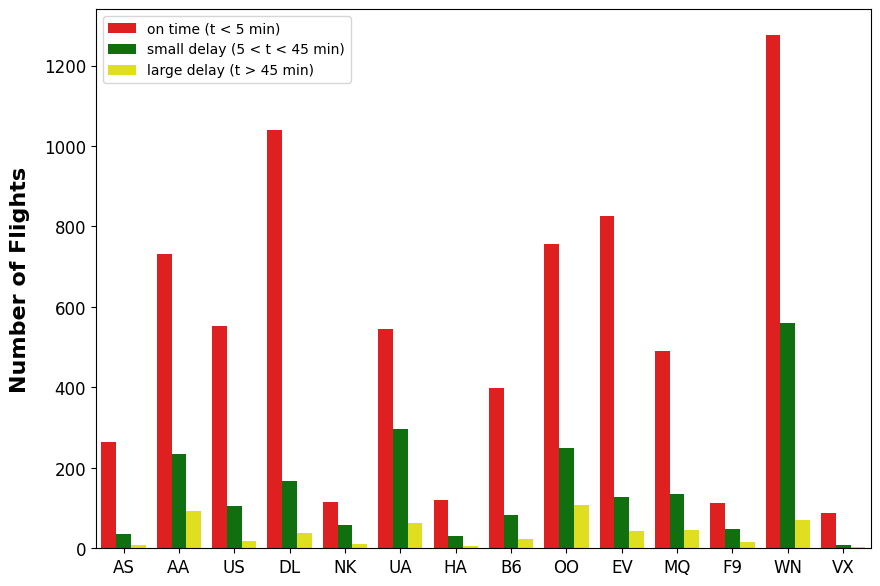

In [ ]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=df, palette= ["red","green","yellow"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('Number of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

<ipython-input-14-03b8e989d219>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=df, color="blue", ci=None)
<ipython-input-14-03b8e989d219>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=df, color="b", hatch = 'X',
<ipython-input-14-03b8e989d219>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


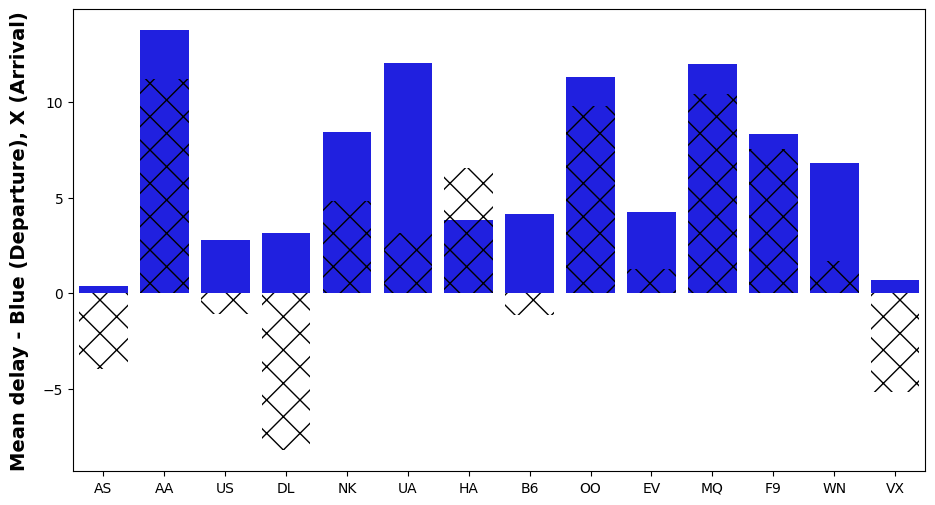

In [ ]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=df, color="blue", ci=None)
ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=df, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Blue (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [ ]:
pip install basemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
from mpl_toolkits.basemap import Basemap

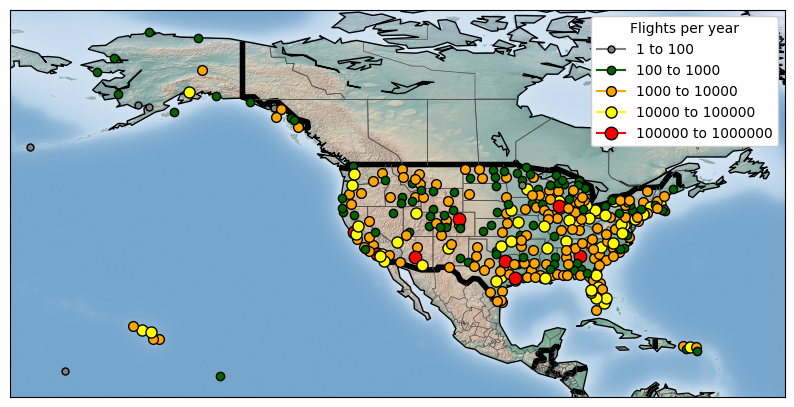

In [ ]:
import matplotlib.pyplot as plt
from collections import OrderedDict
flightcount = df['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(10,10))

colors = ['grey', 'darkgreen', 'orange','yellow', 'red', 'blue']
size = [1, 100, 1000, 10000, 100000, 1000000]
labels = ["1 to 100", "100 to 1000", "1000 to 10000", "10000 to 100000", "100000 to 1000000"]

map = Basemap(llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 4)
map.drawstates(color='0.3')

for index, (code, y,x) in airport[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size) if val < flightcount[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind], markeredgecolor='k', label = labels[ind])

handles, labels = plt.gca().get_legend_handles_labels()
labels_ord = OrderedDict(zip(labels, handles))
keys = ('1 to 100','100 to 1000', '1000 to 10000', '10000 to 100000', '100000 to 1000000')
lnew = OrderedDict()
for item in keys:
    lnew[item] = labels_ord[item]
plt.legend(lnew.values(), lnew.keys(), loc = 1, prop= {'size':10}, title='Flights per year', frameon = True, framealpha = 1)
plt.show()

In [ ]:
airport.isnull().sum()

,0
IATA_CODE,0
AIRPORT,0
CITY,0
STATE,0
COUNTRY,0
LATITUDE,3
LONGITUDE,3


In [ ]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [ ]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [ ]:
airlines


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [127]:
flightsinfo_NULL = df.isnull().sum()*100/df.shape[0]
flightsinfo_NULL

,0
YEAR,0.000
MONTH,0.000
DAY,0.000
DAY_OF_WEEK,0.000
AIRLINE,0.000
FLIGHT_NUMBER,0.000
TAIL_NUMBER,0.167
ORIGIN_AIRPORT,0.000
DESTINATION_AIRPORT,0.000
SCHEDULED_DEPARTURE,0.000


In [128]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
flightsinfo1 = df.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [130]:
flightsinfo1.shape

(97387, 31)

In [131]:
flightsinfo1.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [132]:
Flights = flightsinfo1.drop(columns=['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                                     'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])


In [133]:
Flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,1102.0,-6.0,23.0,1125.0,71.0,66.0,40.0,238,1205.0,3.0,1219,1208.0,-11.0,0,0
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,1117.0,9.0,11.0,1128.0,274.0,267.0,248.0,2176,1836.0,8.0,1842,1844.0,2.0,0,0
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,1101.0,-7.0,28.0,1129.0,77.0,91.0,59.0,238,1228.0,4.0,1225,1232.0,7.0,0,0
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,1116.0,7.0,26.0,1142.0,165.0,157.0,123.0,1005,1445.0,8.0,1454,1453.0,-1.0,0,0


##checking outliers

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(Flights);
plt.title('The dataset before outlier removal ')
plt.xticks(rotation=45)
plt.show()



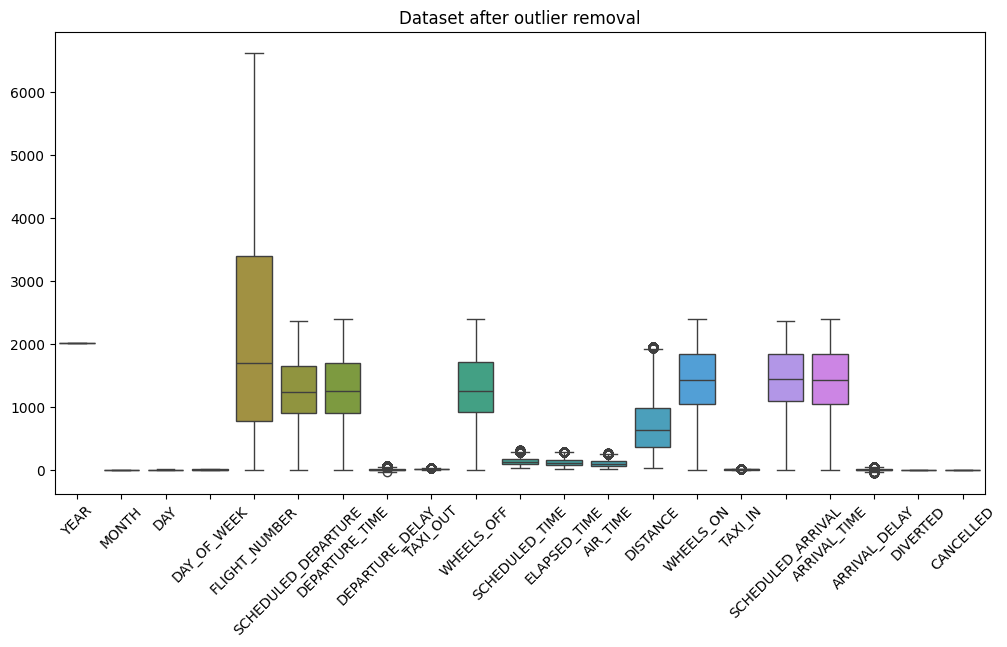

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Function to remove outliers using the IQR method
def remove_outliers(Flights):
    for column in Flights.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = Flights[column].quantile(0.25)
        Q3 = Flights[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to remove outliers for each column
        Flights= Flights[(Flights[column] >= lower_bound) & (Flights[column] <= upper_bound)]
    return Flights

# Assuming flightsinfo1 is your DataFrame
Flights = remove_outliers(Flights)

# Visualize the dataset after outlier removal with column names visible
plt.figure(figsize=(12, 6))  # Adjust the figure size if necessary
sns.boxplot(data=Flights)
plt.title('Dataset after outlier removal')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [136]:
Flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

In [137]:
Flights.shape

(67988, 25)

In [19]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 9593 non-null   int64  
 1   MONTH                9593 non-null   int64  
 2   DAY                  9593 non-null   int64  
 3   DAY_OF_WEEK          9593 non-null   int64  
 4   AIRLINE              9593 non-null   object 
 5   FLIGHT_NUMBER        9593 non-null   int64  
 6   TAIL_NUMBER          9593 non-null   object 
 7   ORIGIN_AIRPORT       9593 non-null   object 
 8   DESTINATION_AIRPORT  9593 non-null   object 
 9   SCHEDULED_DEPARTURE  9593 non-null   int64  
 10  DEPARTURE_TIME       9593 non-null   float64
 11  DEPARTURE_DELAY      9593 non-null   float64
 12  TAXI_OUT             9593 non-null   float64
 13  WHEELS_OFF           9593 non-null   float64
 14  SCHEDULED_TIME       9593 non-null   float64
 15  ELAPSED_TIME         9593 non-null   float6

In [ ]:
#flightsinfo2['Date'] = pd.to_datetime(flightsinfo2['Date'])
#flightsinfo2['Day'] = flightsinfo2['Date'].apply(lambda x: x.strftime('%A'))

In [138]:
flightsinfo2=Flights

In [139]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2015,1,7,3,OO,4774,N463SW,SLC,PSC,1107,1113.0,6.0,14.0,1127.0,110.0,100.0,81.0,521,1148.0,5.0,1157,1153.0,-4.0,0,0
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,1102.0,-6.0,23.0,1125.0,71.0,66.0,40.0,238,1205.0,3.0,1219,1208.0,-11.0,0,0
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,1101.0,-7.0,28.0,1129.0,77.0,91.0,59.0,238,1228.0,4.0,1225,1232.0,7.0,0,0
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,1116.0,7.0,26.0,1142.0,165.0,157.0,123.0,1005,1445.0,8.0,1454,1453.0,-1.0,0,0


In [140]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [141]:
flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [142]:
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [143]:
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [144]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [145]:
flightsinfo2.shape

(67988, 39)

In [146]:
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [147]:

flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [148]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,ANC,Ted Stevens Anchorage International Airport,Anchorage
2,2015,1,1,4,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,Delta Air Lines Inc.,SFO,San Francisco International Airport,San Francisco,MSP,Minneapolis-Saint Paul International Airport,Minneapolis
3,2015,1,1,4,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,Spirit Air Lines,LAS,McCarran International Airport,Las Vegas,MSP,Minneapolis-Saint Paul International Airport,Minneapolis
4,2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,American Airlines Inc.,SFO,San Francisco International Airport,San Francisco,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67983,2015,1,7,3,4774,N463SW,SLC,PSC,1107,1113.0,6.0,14.0,1127.0,110.0,100.0,81.0,521,1148.0,5.0,1157,1153.0,-4.0,0,0,Skywest Airlines Inc.,SLC,Salt Lake City International Airport,Salt Lake City,PSC,Tri-Cities Airport,Pasco
67984,2015,1,7,3,4992,N837AS,ATL,BQK,1108,1102.0,-6.0,23.0,1125.0,71.0,66.0,40.0,238,1205.0,3.0,1219,1208.0,-11.0,0,0,Atlantic Southeast Airlines,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,BQK,Brunswick Golden Isles Airport,Brunswick
67985,2015,1,7,3,5606,N582SW,SFO,BFL,1108,1101.0,-7.0,28.0,1129.0,77.0,91.0,59.0,238,1228.0,4.0,1225,1232.0,7.0,0,0,Skywest Airlines Inc.,SFO,San Francisco International Airport,San Francisco,BFL,Meadows Field,Bakersfield
67986,2015,1,7,3,1135,N38473,ORD,MCO,1109,1116.0,7.0,26.0,1142.0,165.0,157.0,123.0,1005,1445.0,8.0,1454,1453.0,-1.0,0,0,United Air Lines Inc.,ORD,Chicago O'Hare International Airport,Chicago,MCO,Orlando International Airport,Orlando


In [149]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

<ipython-input-76-9fcf87e9f032>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
<ipython-input-76-9fcf87e9f032>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticklabels())


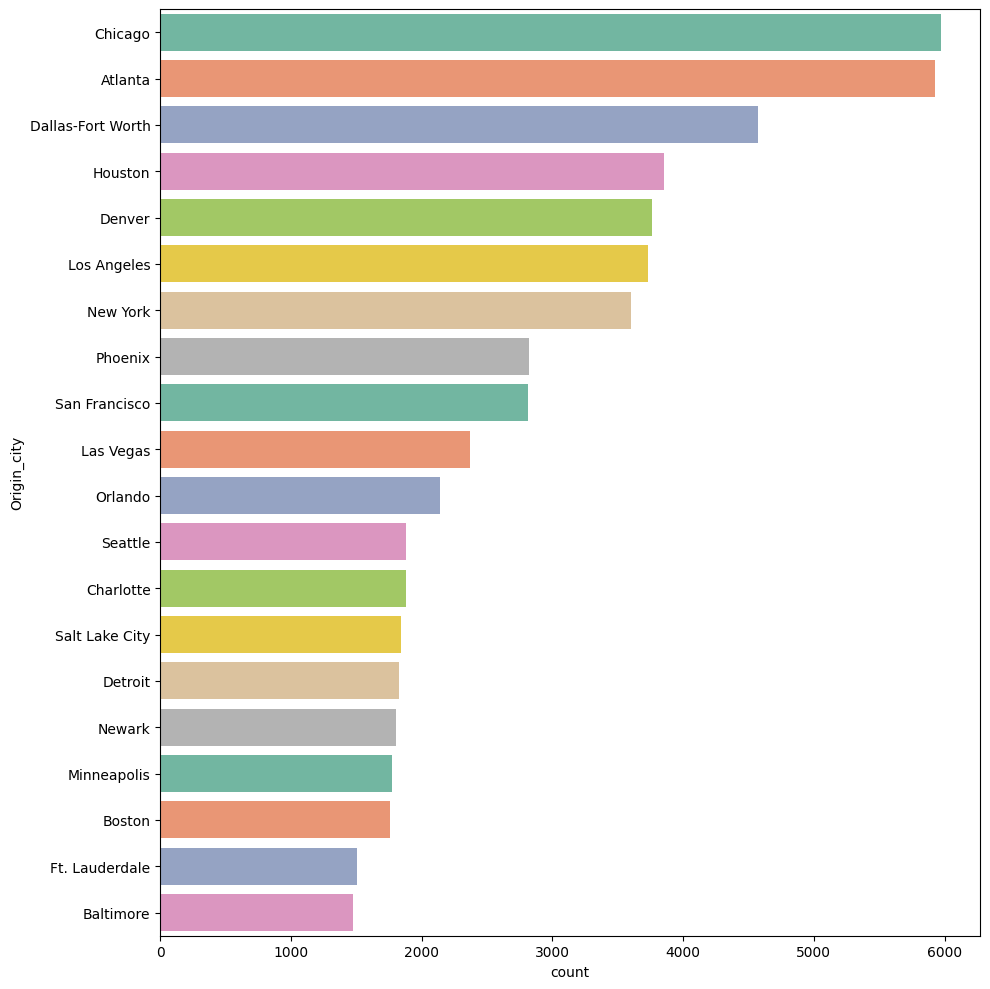

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()

<ipython-input-77-22d3873a04e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")


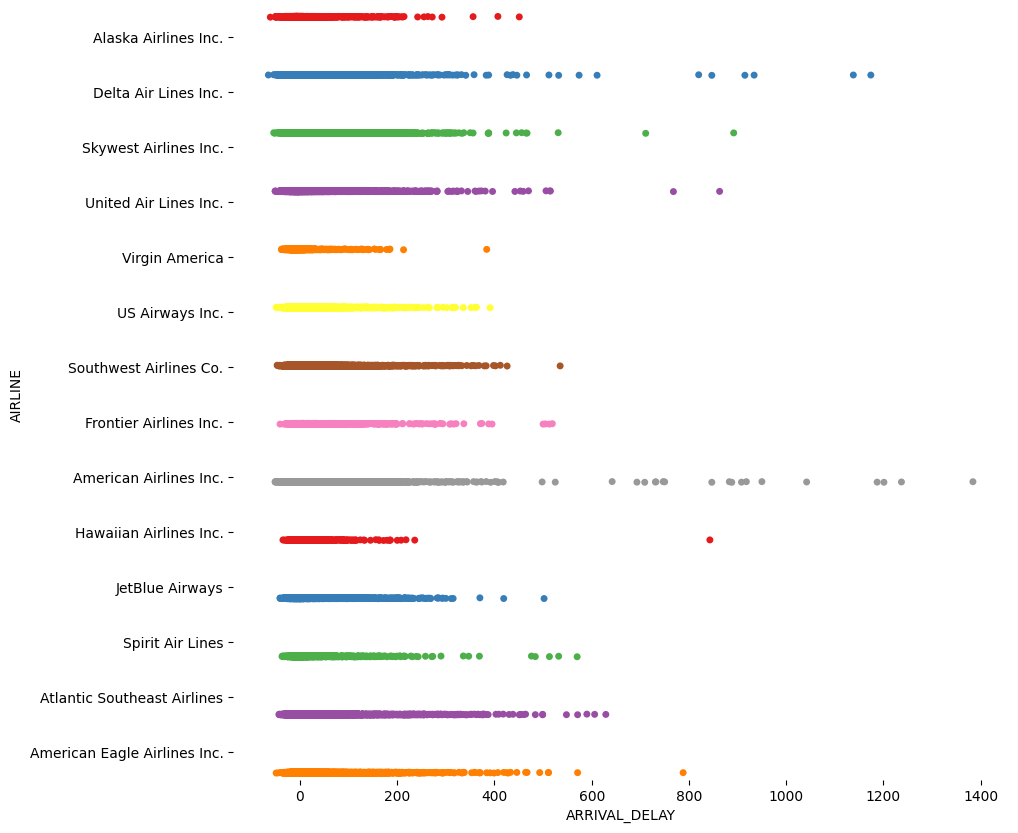

In [ ]:
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")
plt.show()

<Axes: >

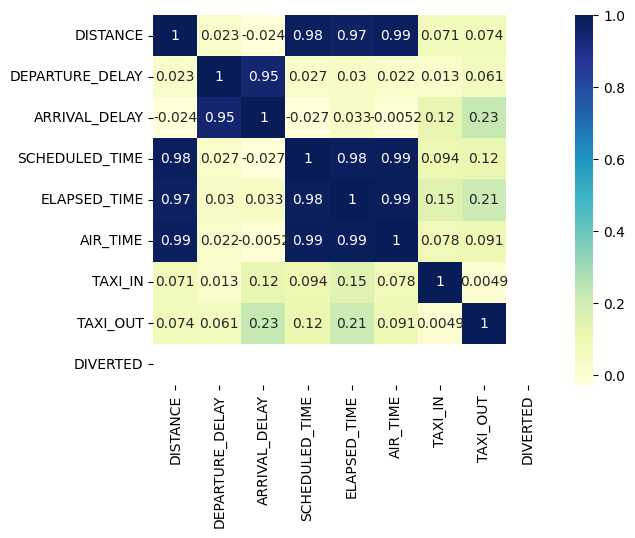

In [ ]:
numeric_flights = Flights.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_flights.corr(), annot=True, cmap="YlGnBu")

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


label encoder is used to convert text values to numbers

In [159]:
Flights1=flightsinfo2

In [160]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67988 entries, 0 to 67987
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 67988 non-null  int64  
 1   MONTH                67988 non-null  int64  
 2   DAY                  67988 non-null  int64  
 3   DAY_OF_WEEK          67988 non-null  int64  
 4   FLIGHT_NUMBER        67988 non-null  int64  
 5   TAIL_NUMBER          67988 non-null  object 
 6   ORIGIN_AIRPORT       67988 non-null  object 
 7   DESTINATION_AIRPORT  67988 non-null  object 
 8   SCHEDULED_DEPARTURE  67988 non-null  int64  
 9   DEPARTURE_TIME       67988 non-null  float64
 10  DEPARTURE_DELAY      67988 non-null  float64
 11  TAXI_OUT             67988 non-null  float64
 12  WHEELS_OFF           67988 non-null  float64
 13  SCHEDULED_TIME       67988 non-null  float64
 14  ELAPSED_TIME         67988 non-null  float64
 15  AIR_TIME             67988 non-null 

In [161]:
Flights1 = flightsinfo2.drop(columns=['Org_Airport_Code', 'Org_Airport_Name', 'Origin_city',
                                      'Dest_Airport_Code', 'Dest_Airport_Name', 'Destination_city'])


In [162]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['DAY'])

In [163]:
Flights1.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIRLINE', 'Day'],
      dtype='object')

In [156]:
Flights1 = Flights1.drop(columns=['SCHEDULED_DEPARTURE','TAIL_NUMBER','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DEPARTURE_TIME'])


In [164]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67988 entries, 0 to 67987
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 67988 non-null  int64  
 1   MONTH                67988 non-null  int64  
 2   DAY                  67988 non-null  int64  
 3   DAY_OF_WEEK          67988 non-null  int64  
 4   FLIGHT_NUMBER        67988 non-null  int64  
 5   TAIL_NUMBER          67988 non-null  object 
 6   ORIGIN_AIRPORT       67988 non-null  int64  
 7   DESTINATION_AIRPORT  67988 non-null  int64  
 8   SCHEDULED_DEPARTURE  67988 non-null  int64  
 9   DEPARTURE_TIME       67988 non-null  float64
 10  DEPARTURE_DELAY      67988 non-null  float64
 11  TAXI_OUT             67988 non-null  float64
 12  WHEELS_OFF           67988 non-null  float64
 13  SCHEDULED_TIME       67988 non-null  float64
 14  ELAPSED_TIME         67988 non-null  float64
 15  AIR_TIME             67988 non-null 

In [165]:
Flights1 = Flights1.drop(columns=['DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','WHEELS_OFF','TAXI_IN','Day'])

In [170]:
Flights1 = Flights1.drop(columns=['TAIL_NUMBER'])

In [ ]:
Flights.columns

In [171]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(67988, 19)

In [172]:
y = Flights1['ARRIVAL_DELAY']
y.head()

,ARRIVAL_DELAY
0,-22.0
1,-21.0
2,8.0
3,-17.0
4,-13.0


In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 5)

In [178]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [179]:
print('X training data size: {}'.format(X_train_sc.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size:  {}'.format(X_test_sc.shape))
print('y testing data size:  {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(Flights1.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(Flights1.index)) * 100))


X training data size: (47591, 19)
y training data size: (47591,)
X testing data size:  (20397, 19)
y testing data size:  (20397,)
70.00% of data is in training set
30.00% of data is in test set


LINEAR REGRESSION

In [180]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print("linear model coefficients:", (LinR.coef_))
print('Accuracy of train model: ',LinR.score(X_train_sc,y_train))
print('Accuracy of test model:',LinR.score(X_test_sc,y_test))
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

linear model coefficients: [ 0.00000000e+00  2.39808173e-14  1.90142318e+00  1.88631746e+00
  1.96593859e-01 -6.01747257e-01 -3.39740308e-02 -1.86636386e+01
  2.36611088e+01 -4.93141775e+01  4.46164866e+01 -2.54586918e-01
  5.57807358e+00  1.22427312e+00 -1.12335158e+00 -9.75290388e-01
  0.00000000e+00  0.00000000e+00  1.01104190e+00]
Accuracy of train model:  0.34833356163622786
Accuracy of test model: 0.3233829196080006
MAE: 10.411210677879115
MSE: 203.27362030394426
RMSE: 14.257405805543456
R2: 0.3233829196080006


Ridge regression:

In [181]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train_sc,y_train)                                    # Fitting the model on Training data
y_pred_ridge = ridge.predict(X_test_sc)                 # Making predictions on Test data


print("Ridge model coefficients:", (ridge.coef_))    # Printing the coefficients
print('\nRidge R2_score on training data:',ridge.score(X_train_sc, y_train))
print('Ridge R2_score on test data:',ridge.score(X_test_sc, y_test))
print('Ridge Mean Square Error      :',mean_squared_error(y_test,y_pred_ridge))
print('Ridge Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Ridge Mean Absolute Error    :',mean_absolute_error(y_test, y_pred_ridge))

Ridge model coefficients: [ 0.00000000e+00  0.00000000e+00  1.90170202e+00  1.88674208e+00
  1.96715404e-01 -6.01502745e-01 -3.41694904e-02 -1.86540453e+01
  2.36509230e+01 -4.92948737e+01  4.45876189e+01 -2.38489366e-01
  5.57136453e+00  1.22454849e+00 -1.12298852e+00 -9.75263576e-01
  0.00000000e+00  0.00000000e+00  1.01083665e+00]

Ridge R2_score on training data: 0.3483335052934857
Ridge R2_score on test data: 0.32340307144878855
Ridge Mean Square Error      : 203.2675661593602
Ridge Root Mean Square Error : 14.257193488178528
Ridge Mean Absolute Error    : 10.411574087299563


Lasso regression

In [182]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_sc,y_train)                                    # Fitting the model on Training data
y_pred_lasso = lasso.predict(X_test_sc)                 # Making predictions on Test data

print("Lasso model coefficients:", (lasso.coef_))    # Printing the coefficients
print('\nLasso R2_score on training data:',lasso.score(X_train_sc, y_train))
print('Lasso R2_score on test data:',lasso.score(X_test_sc, y_test))
print('Lasso Mean Square Error      :',mean_squared_error(y_test,y_pred_lasso))
print('Lasso Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('Lasso Mean Absolute Error    :',mean_absolute_error(y_test, y_pred_lasso))



Lasso model coefficients: [ 0.00000000e+00  0.00000000e+00  1.81290832e+00  1.86148606e+00
  2.77868235e-04 -3.61870966e-01 -0.00000000e+00 -1.19381257e+01
  1.64846150e+01 -4.04519656e+01  3.87616400e+01  0.00000000e+00
  2.10061510e+00 -0.00000000e+00 -2.73387467e-01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.86398987e-01]

Lasso R2_score on training data: 0.3370121349948185
Lasso R2_score on test data: 0.32399540661652637
Lasso Mean Square Error      : 203.08961304899879
Lasso Root Mean Square Error : 14.250951303298976
Lasso Mean Absolute Error    : 10.706575627978378


xgb boost regressor


In [89]:
pip install xgboost

In [184]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train_sc,y_train)
print('Accuracy of train model:',xgb.score(X_train_sc,y_train))
print('Accuracy of test model:',xgb.score(X_test_sc,y_test))
y_pred_xg= xgb.predict(X_test_sc)
R2_XGB=r2_score(y_test,y_pred_xg)
print('r2 score',r2_score(y_test,y_pred_xg))
MAE_XGB=mean_absolute_error(y_test,y_pred_xg)
print('MAE',mean_absolute_error(y_test,y_pred_xg))
MSE_XGB=mean_squared_error(y_test,y_pred_xg)
print('MSE',mean_squared_error(y_test,y_pred_xg))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred_xg)))

Accuracy of train model: 0.9710700042371253
Accuracy of test model: 0.9521838703350015
r2 score 0.9521838703350015
MAE 2.7525828859324126
MSE 14.365226754689523
RMSE: 3.7901486454609565


In [185]:
import xgboost
import pickle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train the XGBoost Regressor
xgb = xgboost.XGBRegressor()
xgb.fit(X_train_sc, y_train)

# Evaluate the model
print('Accuracy of train model:', xgb.score(X_train_sc, y_train))
print('Accuracy of test model:', xgb.score(X_test_sc, y_test))

# Predictions
y_pred_xg = xgb.predict(X_test_sc)

# R2 Score
R2_XGB = r2_score(y_test, y_pred_xg)
print('r2 score', R2_XGB)

# MAE (Mean Absolute Error)
MAE_XGB = mean_absolute_error(y_test, y_pred_xg)
print('MAE:', MAE_XGB)

# MSE (Mean Squared Error)
MSE_XGB = mean_squared_error(y_test, y_pred_xg)
print('MSE:', MSE_XGB)

# RMSE (Root Mean Squared Error)
RMSE_XGB = np.sqrt(MSE_XGB)
print('RMSE:', RMSE_XGB)

# Save the XGBoost model to a file using pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

print("XGBoost model saved successfully.")


Accuracy of train model: 0.9710700042371253
Accuracy of test model: 0.9521838703350015
r2 score 0.9521838703350015
MAE: 2.7525828859324126
MSE: 14.365226754689523
RMSE: 3.7901486454609565
XGBoost model saved successfully.


DECISION TREE REGRESSOR


In [112]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print('Accuracy of train model:',Dtc.score(X_train_sc,y_train))
print('Accuracy of test model:',Dtc.score(X_test_sc,y_test))
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

Accuracy of train model: 1.0
Accuracy of test model: 0.43209753621469027
MAE: 12.79638637943016
MSE: 485.7526059763725
RMSE: 22.039795960406995
R2: 0.43209753621469027


Elastic net regression



In [113]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train_sc, y_train)                                              # Fitting the model on Training data
y_pred_en = en.predict(X_test_sc)
print("Elastic Net Regression model coefficients:", (en.coef_))    # Printing the coefficients
print('\nEN R2_score on training data:',en.score(X_train_sc, y_train))
print('EN R2_score on test data:',en.score(X_test_sc, y_test))
print('EN Mean Square Error      :',mean_squared_error(y_test,y_pred_en))
print('EN Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_en)))
print('EN Mean Absolute Error    :',mean_absolute_error(y_test, y_pred_en))




Elastic Net Regression model coefficients: [ 0.          0.          0.          0.          1.1346052   0.
 -0.         -1.40653534  4.11307936 -0.28678364  1.44181705  0.
 -0.          1.38194871 -2.04157921  1.89969491  0.          0.
 -0.        ]

EN R2_score on training data: 0.05320501166479519
EN R2_score on test data: 0.0635294592378447
EN Mean Square Error      : 801.0055152134147
EN Root Mean Square Error : 28.302040831244213
EN Mean Absolute Error    : 16.907748678224774


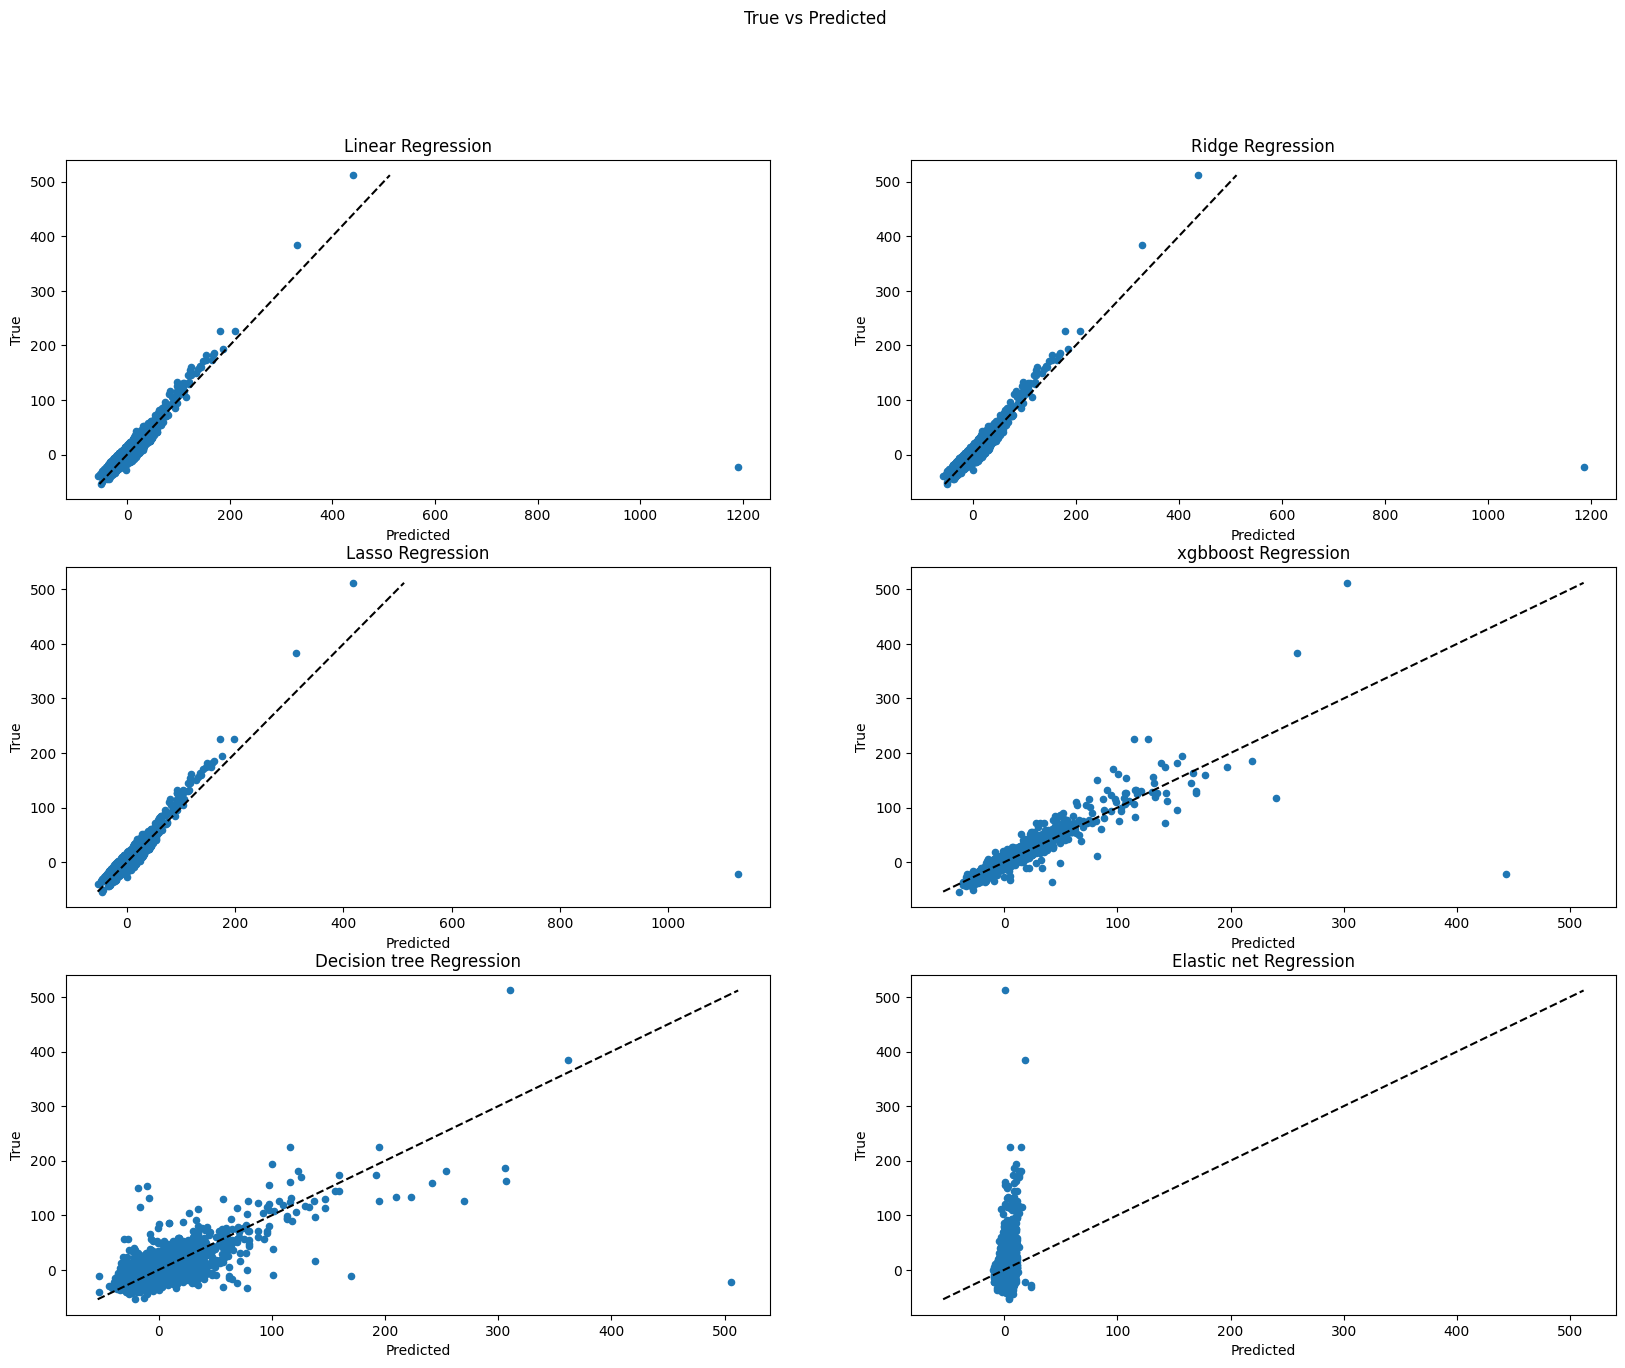

In [115]:
fig, axs = plt.subplots(3,2,figsize=(20,15))
ax1, ax2, ax3, ax4, ax5,ax6= axs.flatten()

ax1.scatter(y_pred, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_ridge, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Ridge Regression")


ax3.scatter(y_pred_lasso, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Lasso Regression")

ax4.scatter(y_pred_xg, y_test, s=20)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax4.set_ylabel("True")
ax4.set_xlabel("Predicted")
ax4.set_title("xgbboost Regression")


ax5.scatter(predictedValues, y_test, s=20)
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax5.set_ylabel("True")
ax5.set_xlabel("Predicted")
ax5.set_title("Decision tree Regression")

ax6.scatter(y_pred_en, y_test, s=20)
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax6.set_ylabel("True")
ax6.set_xlabel("Predicted")
ax6.set_title("Elastic net Regression")

fig.suptitle("True vs Predicted");




In [117]:
pred1=pd.DataFrame({"y_test":y_test,'y_pred':y_pred_xg})
pred1.head()

,y_test,y_pred
1270,1.0,6.007409
8132,-41.0,-36.072216
9321,-6.0,-9.947470
6967,-6.0,-2.086746
6264,6.0,0.220458
